In [1]:
# Load the tidyverse collection of packages
library(tidyverse)
library(knitr)    # for descriptive tables
install.packages("skimr")   # for nice summary plots
library(skimr)
install.packages("viridis")   # for colorblind-friendly palette
library(viridis)
install.packages("table1")
library(table1)    # for nice 'Table 1' for papers
library(ggplot2)
library(reshape2)
library(tidyr)
install.packages("expss")

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.3      ✔ purrr   1.0.1 
✔ tibble  3.2.1      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.4      ✔ forcats 1.0.0 
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
“package ‘knit

In [2]:
regression_data <- read_csv('/Users/charlotte/Desktop/Report Development/Notebooks/data/regression_data.csv')

regression_data <- regression_data %>%
    mutate(urban_rural = as.factor(urban_rural) %>%
               fct_recode("Urban" = "1",
                          "Rural" = "0"))

dim(regression_data)
head(regression_data)

Rows: 893 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): urban_rural, DataZone
dbl (9): q1_positive, q2_positive, q3_positive, income_quintile, age_distrib...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“Unknown levels in `f`: 1, 0”


[1] 893  11

q1_positive,q2_positive,q3_positive,income_quintile,age_distribution,minority_pop,employment_percentage,gender_distribution,urban_rural,employment_rate,DataZone
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<chr>
73.31,97.44,91.45,4,71.12,8.46,77.1,50.11,Urban,0.06,S01012126
78.51,93.93,87.44,1,69.95,9.06,69.8,48.86,Urban,0.31,S01010055
87.11,95.03,98.06,3,60.53,9.93,75.3,49.52,Rural,0.07,S01012014
81.81,92.53,94.82,4,64.95,3.42,74.8,51.36,Rural,0.04,S01013014
25.34,53.32,67.33,4,61.22,7.13,75.3,49.47,Rural,0.05,S01011052
73.95,70.04,88.54,1,82.37,14.25,69.8,49.25,Urban,0.15,S01010386


In [4]:
# Create labels for tables
label(regression_data$q1_positive) <- "Positive Satisfaction Score"
label(regression_data$q2_positive) <- "Positive Access Score"
label(regression_data$q3_positive) <- "Positive Communication Score"
label(regression_data$income_quintile) <- "Income Deprivation"
label(regression_data$age_distribution) <- "Age Distribution: % Working Age"
label(regression_data$minority_pop) <- "Ethnic Distribution: % Minority"
label(regression_data$gender_distribution) <- "Gender Distribution: % Female"
label(regression_data$urban_rural) <- "Urban/Rural Location"

In [6]:
# Run Satisfaction Model
mlr_satisfaction_fct <- 
    lm(q1_positive ~ income_quintile +
       age_distribution +
       employment_rate +
       minority_pop +
       gender_distribution +
       urban_rural,
       data = regression_data, 
       na.action = na.exclude)

# Run Access Model
mlr_access_fct <- 
    lm(q2_positive ~ income_quintile +
       age_distribution +
       employment_rate +
       minority_pop +
       gender_distribution +
       urban_rural,
       data = regression_data, 
       na.action = na.exclude)

# Run Communication Model
mlr_communication_fct <- 
    lm(q3_positive ~ income_quintile +
       age_distribution +
       employment_rate +
       minority_pop +
       gender_distribution +
       urban_rural,
       data = regression_data, 
       na.action = na.exclude)

In [7]:
# Create a new dataframe NA_checker with rows containing NAs
NA_checker <- regression_data[!complete.cases(regression_data), ]

# View the new dataframe
head(NA_checker)

q1_positive,q2_positive,q3_positive,income_quintile,age_distribution,minority_pop,employment_percentage,gender_distribution,urban_rural,employment_rate,DataZone
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<chr>


In [8]:
regression_data <- regression_data %>%
  mutate(income_quintile = as.factor(income_quintile))

regression_data <- regression_data%>%
    mutate(income_quintile = fct_recode(income_quintile, 
                                        "Most deprived" = "1", 
                                        "Second" = "2", 
                                        "Third" = "3", 
                                        "Fourth" = "4",
                                        "Least deprived" = "5"))

# Multiply employment_rate by 100 to match other formats
regression_data$employment_rate_percent <- regression_data$employment_rate * 100
label(regression_data$employment_rate_percent) <- "Employment Status: % Unemployed"

IRdisplay::display_html(table1(~ q1_positive +
                               q2_positive +
                               q3_positive +
                               age_distribution +
                               employment_rate_percent +
                               minority_pop +
                               gender_distribution +
                               urban_rural |
                               income_quintile,
                               data = regression_data,
                               overall = "Total"
                              )
                       )

,Most deprived(N=228),Second(N=207),Third(N=216),Fourth(N=168),Least deprived(N=74),Total(N=893)
Positive Satisfaction Score,,,,,,
Mean (SD),65.9 (14.4),65.8 (15.6),72.1 (16.3),74.0 (16.1),73.9 (13.1),69.6 (15.8)
"Median [Min, Max]","67.5 [13.0, 98.9]","66.3 [14.6, 100]","74.3 [20.5, 100]","76.9 [21.0, 100]","73.0 [28.5, 98.5]","71.0 [13.0, 100]"
Positive Access Score,,,,,,
Mean (SD),84.8 (10.1),85.1 (9.74),87.3 (10.2),86.6 (9.98),86.2 (8.76),85.9 (9.97)
"Median [Min, Max]","87.6 [40.7, 100]","87.3 [44.0, 100]","90.2 [47.9, 100]","88.0 [52.3, 100]","87.5 [62.1, 100]","88.1 [40.7, 100]"
Positive Communication Score,,,,,,
Mean (SD),84.8 (7.46),85.6 (7.18),87.9 (7.26),89.1 (7.48),89.5 (5.70),86.9 (7.43)
"Median [Min, Max]","85.4 [53.2, 100]","86.8 [63.3, 100]","89.0 [59.9, 99.3]","90.5 [56.1, 100]","90.1 [73.3, 98.2]","87.9 [53.2, 100]"
Age Distribution: % Working Age,,,,,,


In [9]:
# New dataframe with boxplot data only
boxplot_data <- regression_data %>%
    select(q1_positive, q2_positive, q3_positive)

# Reshape the data from wide to long format for boxplot plotting
# by renaming columns and using gather from tidyr
boxplot_data_long <- boxplot_data %>%
  rename("Satisfaction" = q1_positive,
         "Access" = q2_positive,
         "Communication" = q3_positive) %>%
  gather(key = "variable", value = "value", Satisfaction, Access, Communication)

# Specify order for boxplot plotting
boxplot_data_long$variable <- factor(boxplot_data_long$variable,
                                     levels = c("Satisfaction",
                                                "Access",
                                                "Communication"
                                               )
                                    )

Warning message:
“attributes are not identical across measure variables; they will be dropped”


In [10]:
head(boxplot_data_long)

variable,value
<fct>,<dbl>
Satisfaction,73.31
Satisfaction,78.51
Satisfaction,87.11
Satisfaction,81.81
Satisfaction,25.34
Satisfaction,73.95


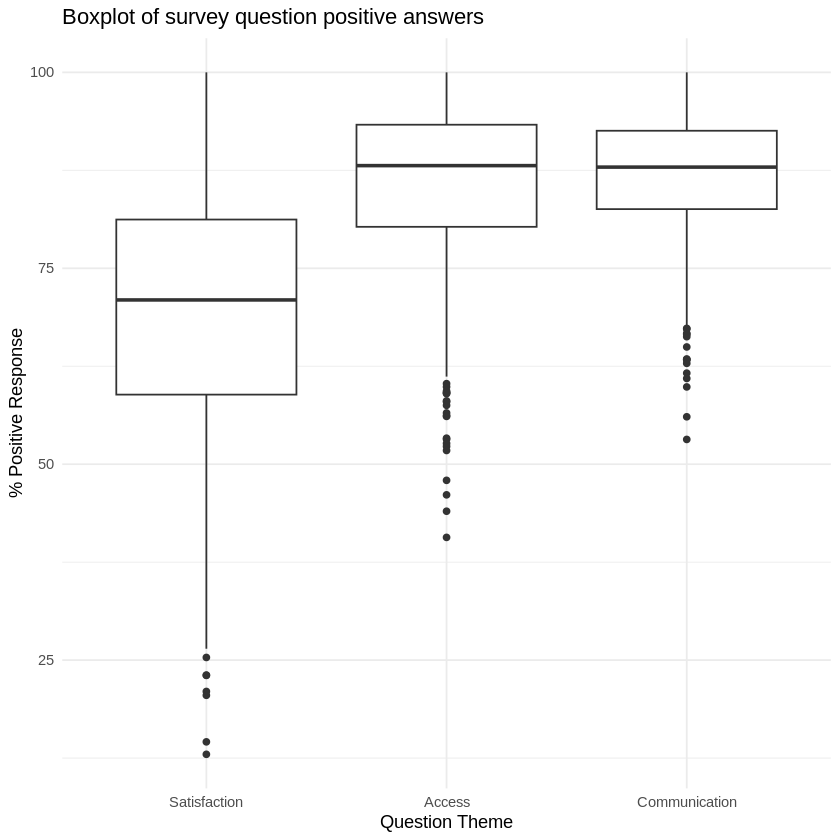

In [11]:
# Plot boxplot with all question themes
ggplot(boxplot_data_long, aes(x = variable, y = value)) +
    geom_boxplot() +
    theme_minimal() +
    labs(title = "Boxplot of survey question positive answers",
             x = "Question Theme",
             y = "% Positive Response")

In [12]:
# Save with ggsave
triple_boxplot <- ggplot(boxplot_data_long, aes(x = variable, y = value)) +
                    geom_boxplot() +
                    theme_minimal() +
                    labs(title = "Boxplot of survey question positive answers",
                             x = "Question Theme",
                             y = "% Positive Response")

ggsave(plot = triple_boxplot, 
       "/Users/charlotte/Desktop/Report Development/Notebooks/figures/combined_boxplot_final.jpg") 

Saving 6.67 x 6.67 in image


In [13]:
table1_descriptive <- table1(~ q1_positive +
                               q2_positive +
                               q3_positive +
                               age_distribution +
                               employment_rate_percent +
                               minority_pop +
                               gender_distribution +
                               urban_rural |
                               income_quintile,
                               data = regression_data,
                               overall = "Total"
                              )

In [14]:
install.packages("flextable")
library(flextable)
library(magrittr)

# Convert to flextable
t1flex(table1_descriptive) %>% 
  save_as_docx(path="/Users/charlotte/Desktop/Report Development/Notebooks/figures/table1_descriptive_final.docx")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘flextable’


The following object is masked from ‘package:purrr’:

    compose


Warning message:
“package ‘magrittr’ was built under R version 4.2.3”

Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract


